## Sample Data from CLP

This jupyter notebook will walk you through the data analysis process for the CLP data. We will use pandas with its dataframe object to conduct the analysis. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataframe = pd.read_csv('dataset.csv')
dataframe.head()


,orgName,zoneName,sensorType,recDate,recTime,reading,unit
0,CLP Innovation,Classroom 101,Lighting,2020-11-15,00:00:00,1.22,Wh
1,CLP Innovation,Classroom 101,Lighting,2020-11-15,00:30:00,1.20,Wh
2,CLP Innovation,Classroom 101,Lighting,2020-11-15,01:00:00,1.21,Wh
3,CLP Innovation,Classroom 101,Lighting,2020-11-15,01:30:00,1.21,Wh
4,CLP Innovation,Classroom 101,Lighting,2020-11-15,02:00:00,1.20,Wh


In [3]:
# Check for each unique values
for col in dataframe.columns:
    print(col + ':' ,dataframe[col].unique())

orgName: ['CLP Innovation']
zoneName: ['Classroom 101' 'Classroom 102' 'Classroom 103' 'Classroom 104' 'Other'
 'STEM Room' 'Server Room' 'Townhall']
sensorType: ['Lighting' 'Socket' 'Fan' 'Exhaust Fan' 'Printer' 'Solar Panel'
 'Air Conditioning' 'Server' 'Projector']
recDate: ['2020-11-15' '2020-11-16' '2020-11-17' '2020-11-18' '2020-11-19'
 '2020-11-20' '2020-11-21' '2020-11-22']
recTime: ['00:00:00' '00:30:00' '01:00:00' '01:30:00' '02:00:00' '02:30:00'
 '03:00:00' '03:30:00' '04:00:00' '04:30:00' '05:00:00' '05:30:00'
 '06:00:00' '06:30:00' '07:00:00' '07:30:00' '08:00:00' '08:30:00'
 '09:00:00' '09:30:00' '10:00:00' '10:30:00' '11:00:00' '11:30:00'
 '12:00:00' '12:30:00' '13:00:00' '13:30:00' '14:00:00' '14:30:00'
 '15:00:00' '15:30:00' '16:00:00' '16:30:00' '17:00:00' '17:30:00'
 '18:00:00' '18:30:00' '19:00:00' '19:30:00' '20:00:00' '20:30:00'
 '21:00:00' '21:30:00' '22:00:00' '22:30:00' '23:00:00' '23:30:00']
reading: [ 1.22  1.2   1.21 ... 53.27 53.25 53.28]
unit: ['Wh']


## Drop all the useless columns 

In [4]:
dataframe = dataframe.drop(columns=['orgName', 'unit'])

In [5]:
dataframe

,zoneName,sensorType,recDate,recTime,reading
0,Classroom 101,Lighting,2020-11-15,00:00:00,1.22
1,Classroom 101,Lighting,2020-11-15,00:30:00,1.20
2,Classroom 101,Lighting,2020-11-15,01:00:00,1.21
3,Classroom 101,Lighting,2020-11-15,01:30:00,1.21
4,Classroom 101,Lighting,2020-11-15,02:00:00,1.20
...,...,...,...,...,...
9595,Townhall,Socket,2020-11-22,21:30:00,53.26
9596,Townhall,Socket,2020-11-22,22:00:00,53.25
9597,Townhall,Socket,2020-11-22,22:30:00,53.29
9598,Townhall,Socket,2020-11-22,23:00:00,53.28


In [6]:
dataframe.groupby('zoneName').describe()
dataframe.groupby('sensorType').describe()

reading                                                \
                   count       mean        std    min      25%     50%   
sensorType                                                               
Air Conditioning   768.0  76.392461  50.801892   0.00  44.9350  91.825   
Exhaust Fan        384.0  21.770130  37.108184   8.14   8.6275  17.270   
Fan               1536.0  10.267526  22.523935   0.00   0.0000   1.030   
Lighting          2688.0  27.459624  42.705093   0.00   0.7700   9.420   
Printer            384.0   6.633359  11.053966   0.64   0.7900   1.020   
Projector          384.0   1.184245  15.244361   0.10   0.1100   0.110   
Server             384.0  39.655625   1.461522  37.08  38.4700  38.620   
Socket            2688.0  39.034461  34.359831   2.92  11.3100  28.520   
Solar Panel        384.0   0.000000   0.000000   0.00   0.0000   0.000   

                                    
                       75%     max  
sensorType                          
Air Conditioning  122.8500  127.16  
Exhaust Fan        17.5000  341.84  
Fan                 6.7100  142.79  
Lighting           36.8000  157.41  
Printer             6.9325  132.80  
Projector           0.1100  252.85  
Server             41.5000   42.85  
Socket             54.7000  253.33  
Solar Panel         0.0000    0.00

In [7]:
## extracting data that zoneName == 'Townhall'

townhall = dataframe[dataframe['zoneName'] == 'Townhall']

In [8]:
townhall = townhall.reset_index().drop(columns='index')
townhall

,zoneName,sensorType,recDate,recTime,reading
0,Townhall,Air Conditioning,2020-11-15,00:00:00,0.00
1,Townhall,Air Conditioning,2020-11-15,00:30:00,0.00
2,Townhall,Air Conditioning,2020-11-15,01:00:00,0.00
3,Townhall,Air Conditioning,2020-11-15,01:30:00,0.00
4,Townhall,Air Conditioning,2020-11-15,02:00:00,0.00
...,...,...,...,...,...
1531,Townhall,Socket,2020-11-22,21:30:00,53.26
1532,Townhall,Socket,2020-11-22,22:00:00,53.25
1533,Townhall,Socket,2020-11-22,22:30:00,53.29
1534,Townhall,Socket,2020-11-22,23:00:00,53.28


In [9]:
from datetime import datetime

datetime.strptime(townhall['recDate'][3]+townhall['recTime'][3], '%Y-%m-%d%H:%M:%S')

datetime.datetime(2020, 11, 15, 1, 30)

In [10]:
townhall_socket = townhall[townhall['sensorType'] == 'Socket']


In [11]:
def changeDatetime(rec_datetime):
    return datetime.strptime(rec_datetime, '%Y-%m-%d%H:%M:%S')

In [12]:
townhall_socket['date and time'] = townhall['recDate'] + townhall['recTime']

In [13]:
townhall_socket['date and time'] = townhall_socket['date and time'].apply(changeDatetime)

In [14]:
townhall_socket = townhall_socket.drop(columns=['recDate', 'recTime'])

In [15]:
townhall_socket

,zoneName,sensorType,reading,date and time
1152,Townhall,Socket,53.66,2020-11-15 00:00:00
1153,Townhall,Socket,53.61,2020-11-15 00:30:00
1154,Townhall,Socket,53.60,2020-11-15 01:00:00
1155,Townhall,Socket,53.61,2020-11-15 01:30:00
1156,Townhall,Socket,53.62,2020-11-15 02:00:00
...,...,...,...,...
1531,Townhall,Socket,53.26,2020-11-22 21:30:00
1532,Townhall,Socket,53.25,2020-11-22 22:00:00
1533,Townhall,Socket,53.29,2020-11-22 22:30:00
1534,Townhall,Socket,53.28,2020-11-22 23:00:00


In [16]:
%matplotlib inline

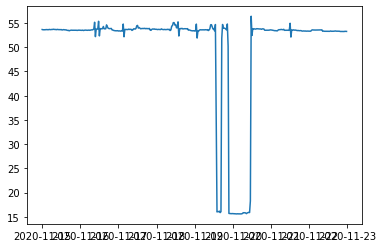

In [17]:
plt.plot(townhall_socket['date and time'], townhall_socket['reading'])

In [43]:
dataframe['Datetime'] = dataframe['recDate'] + dataframe['recTime']
dataframe['Datetime'] = dataframe['Datetime'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d%H:%M:%S'))

In [61]:
lighting = dataframe[dataframe['sensorType'] == 'Lighting']

In [63]:
lighting[lighting['zoneName'] == 'Classroom 101']

,zoneName,sensorType,recDate,recTime,reading,Datetime
0,Classroom 101,Lighting,2020-11-15,00:00:00,1.22,2020-11-15 00:00:00
1,Classroom 101,Lighting,2020-11-15,00:30:00,1.20,2020-11-15 00:30:00
2,Classroom 101,Lighting,2020-11-15,01:00:00,1.21,2020-11-15 01:00:00
3,Classroom 101,Lighting,2020-11-15,01:30:00,1.21,2020-11-15 01:30:00
4,Classroom 101,Lighting,2020-11-15,02:00:00,1.20,2020-11-15 02:00:00
...,...,...,...,...,...,...
379,Classroom 101,Lighting,2020-11-22,21:30:00,1.04,2020-11-22 21:30:00
380,Classroom 101,Lighting,2020-11-22,22:00:00,1.05,2020-11-22 22:00:00
381,Classroom 101,Lighting,2020-11-22,22:30:00,1.04,2020-11-22 22:30:00
382,Classroom 101,Lighting,2020-11-22,23:00:00,1.04,2020-11-22 23:00:00


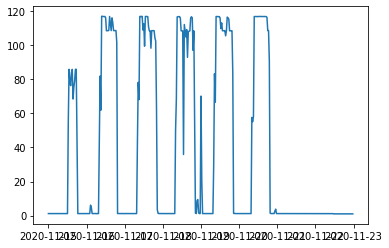

In [64]:
plt.plot(lighting[lighting['zoneName'] == 'Classroom 101']['Datetime'], lighting[lighting['zoneName'] == 'Classroom 101']['reading'])

In [65]:
lighting_classroom101 = lighting[lighting['zoneName'] == 'Classroom 101']
lighting_classroom101

,zoneName,sensorType,recDate,recTime,reading,Datetime
0,Classroom 101,Lighting,2020-11-15,00:00:00,1.22,2020-11-15 00:00:00
1,Classroom 101,Lighting,2020-11-15,00:30:00,1.20,2020-11-15 00:30:00
2,Classroom 101,Lighting,2020-11-15,01:00:00,1.21,2020-11-15 01:00:00
3,Classroom 101,Lighting,2020-11-15,01:30:00,1.21,2020-11-15 01:30:00
4,Classroom 101,Lighting,2020-11-15,02:00:00,1.20,2020-11-15 02:00:00
...,...,...,...,...,...,...
379,Classroom 101,Lighting,2020-11-22,21:30:00,1.04,2020-11-22 21:30:00
380,Classroom 101,Lighting,2020-11-22,22:00:00,1.05,2020-11-22 22:00:00
381,Classroom 101,Lighting,2020-11-22,22:30:00,1.04,2020-11-22 22:30:00
382,Classroom 101,Lighting,2020-11-22,23:00:00,1.04,2020-11-22 23:00:00
